# Introduction to Phylopandas

Let me introduce you to PhyloPandas. A Pandas dataframe and interface for phylogenetics.

In [1]:
import pandas as pd
import phylopandas as ph

## Reading data

Phylopandas comes with various `read_` methods to load phylogenetic data into a Pandas DataFrame.

Check out the various formats by hitting `tab` after `read` in the cell below.

In [ ]:
ph.read

Try reading some of the sequence files in the `data` folder.

In [2]:
ph.read_fasta('data/PF08793_seed.fasta')

,description,id,label,sequence,uid
0,Q0E553_SFAVA/184-218,Q0E553_SFAVA/184-218,Q0E553_SFAVA/184-218,KCIAFDK----ND-KINPFTGRPINENNDTYRMIYSMCHG,rmm5JFpOwr
1,Q8QUQ5_ISKNN/123-157,Q8QUQ5_ISKNN/123-157,Q8QUQ5_ISKNN/123-157,ACALYYD----DP-TVNPFTDEPLRRYSPIDDLLYRNCES,WDilFNZp7Y
2,Q0E553_SFAVA/142-176,Q0E553_SFAVA/142-176,Q0E553_SFAVA/142-176,YCTNFHR----DE-SRNPLTGKKLVPTSPIRKAWHKMCSG,cnBXyjdalX
3,Q8QUQ5_ISKNN/45-79,Q8QUQ5_ISKNN/45-79,Q8QUQ5_ISKNN/45-79,LCAEYKR----SP-RYNPWTDRTLAPGSPKHNLISGMCGG,0X9Z5GByCp
4,Q8QUQ6_ISKNN/37-75,Q8QUQ6_ISKNN/37-75,Q8QUQ6_ISKNN/37-75,VCNDLALCSQHTD-TYNPWTDRALLPDSPVHDMIDYVCNT,3cm7Kr97Yw
5,019R_FRG3G/249-283,019R_FRG3G/249-283,019R_FRG3G/249-283,VCERFAA----DP-TRNPVTGSPLSRNDPLYTDLMEICKG,LyA3HIbCM7
6,019R_FRG3G/302-336,019R_FRG3G/302-336,019R_FRG3G/302-336,TCEAFCR----DP-TRNPVTGQKMRRNGIEYQMFAEECDC,zvUovORVct
7,VF380_IIV6/7-45,VF380_IIV6/7-45,VF380_IIV6/7-45,KCDEWEKIRLNSS-PKNPFTKRNVKKDGPTYKKIDLICKH,Zyz4olIsFP
8,VF380_IIV3/8-47,VF380_IIV3/8-47,VF380_IIV3/8-47,KCYEWDIAKKKSPLPKSPLTGRKLKQHGPTWKKITAECAT,jyaov8CbMP
9,VF378_IIV6/4-38,VF378_IIV6/4-38,VF378_IIV6/4-38,KCSKWHE----QP-LINPLTNRKIKKNGPTYKELERECGP,soUOEu1AAn


In [3]:
ph.read_phylip('data/PF08793_seed.phylip')

,description,id,label,sequence,uid
0,seq-0,seq-0,seq-0,KCIAFDK----ND-KINPFTGRPINENNDTYRMIYSMCHG,GbEGmYsPU1
1,seq-1,seq-1,seq-1,ACALYYD----DP-TVNPFTDEPLRRYSPIDDLLYRNCES,XsNm8uJKxt
2,seq-2,seq-2,seq-2,YCTNFHR----DE-SRNPLTGKKLVPTSPIRKAWHKMCSG,wg0VTlOKHJ
3,seq-3,seq-3,seq-3,LCAEYKR----SP-RYNPWTDRTLAPGSPKHNLISGMCGG,9JjPLybA4e
4,seq-4,seq-4,seq-4,VCNDLALCSQHTD-TYNPWTDRALLPDSPVHDMIDYVCNT,Ic9ubJu6k4
5,seq-5,seq-5,seq-5,VCERFAA----DP-TRNPVTGSPLSRNDPLYTDLMEICKG,sHeONKRJqd
6,seq-6,seq-6,seq-6,TCEAFCR----DP-TRNPVTGQKMRRNGIEYQMFAEECDC,OkyDJiw2yj
7,seq-7,seq-7,seq-7,KCDEWEKIRLNSS-PKNPFTKRNVKKDGPTYKKIDLICKH,q4CXns1FLL
8,seq-8,seq-8,seq-8,KCYEWDIAKKKSPLPKSPLTGRKLKQHGPTWKKITAECAT,V4K2HxCjkq
9,seq-9,seq-9,seq-9,KCSKWHE----QP-LINPLTNRKIKKNGPTYKELERECGP,14FDnqBaC9


In [5]:
ph.read_clustal('data/PF08793_seed.clustal')

,description,id,label,sequence,uid
0,seq-0,seq-0,<unknown name>,KCIAFDK----ND-KINPFTGRPINENNDTYRMIYSMCHG,73UK3DFq9J
1,seq-1,seq-1,<unknown name>,ACALYYD----DP-TVNPFTDEPLRRYSPIDDLLYRNCES,dYZhgw6Vyv
2,seq-2,seq-2,<unknown name>,YCTNFHR----DE-SRNPLTGKKLVPTSPIRKAWHKMCSG,dAxgIOKrUK
3,seq-3,seq-3,<unknown name>,LCAEYKR----SP-RYNPWTDRTLAPGSPKHNLISGMCGG,My5hu0bMnP
4,seq-4,seq-4,<unknown name>,VCNDLALCSQHTD-TYNPWTDRALLPDSPVHDMIDYVCNT,QkYdNRZYYc
5,seq-5,seq-5,<unknown name>,VCERFAA----DP-TRNPVTGSPLSRNDPLYTDLMEICKG,5LzoZzog17
6,seq-6,seq-6,<unknown name>,TCEAFCR----DP-TRNPVTGQKMRRNGIEYQMFAEECDC,m6VVyFNres
7,seq-7,seq-7,<unknown name>,KCDEWEKIRLNSS-PKNPFTKRNVKKDGPTYKKIDLICKH,FXFXuSZRCP
8,seq-8,seq-8,<unknown name>,KCYEWDIAKKKSPLPKSPLTGRKLKQHGPTWKKITAECAT,mXTFY8pTWr
9,seq-9,seq-9,<unknown name>,KCSKWHE----QP-LINPLTNRKIKKNGPTYKELERECGP,yjgsgyoatO


## Writing data

PhyloPandas attaches a `phylo` accessor to the standard Pandas DataFrame. Inside this accessor are various writing methods, following Pandas syntax, allowing you to write to various sequence formats.

To quickly see the writing functions, hit `tab` after `to_` in the cell below.

In [6]:
df = ph.read_fasta('data/PF08793_seed.fasta')

df.phylo.to_

Let's write the dataframe back out to fasta. If you don't give a filename, it will return a string.

In [9]:
s = df.phylo.to_fasta()
print(s)

>Nn9wk3JSHa
KCIAFDK----ND-KINPFTGRPINENNDTYRMIYSMCHG
>bULPZFHZEU
ACALYYD----DP-TVNPFTDEPLRRYSPIDDLLYRNCES
>3M7UVfa3q6
YCTNFHR----DE-SRNPLTGKKLVPTSPIRKAWHKMCSG
>8wT3igGRJb
LCAEYKR----SP-RYNPWTDRTLAPGSPKHNLISGMCGG
>KjR7SsotNC
VCNDLALCSQHTD-TYNPWTDRALLPDSPVHDMIDYVCNT
>YaySjVqFPN
VCERFAA----DP-TRNPVTGSPLSRNDPLYTDLMEICKG
>OWdRBsU7um
TCEAFCR----DP-TRNPVTGQKMRRNGIEYQMFAEECDC
>5eNQYaHFWy
KCDEWEKIRLNSS-PKNPFTKRNVKKDGPTYKKIDLICKH
>y4X6Sko8C5
KCYEWDIAKKKSPLPKSPLTGRKLKQHGPTWKKITAECAT
>Ny2tSznFA4
KCSKWHE----QP-LINPLTNRKIKKNGPTYKELERECGP
>F4hBz8CCht
LCSKWKA----NP-LVNPATGRKIKKDGPVYEKIQKKCS-
>ozK21lBtqB
YCDEFER----NP-TRNPRTGRTIKRGGPVFRALERECSD
>bHMdihvmnV
-CPEFAR----DP-TRNPRTGRTIKRGGPTYRALEAECAD
>wNWqqWQGy7
ECEQWLA----NK-GINPRTGKAIKIGGPTYKKLEMECKE
>zxHPRI9CoG
VCKKFLA----NK-TVSPYSGRPIKPGKKLYNDLEKHCSG
>5oy9YcATuu
QCRAFEE----NP-DVNPNTGRRISPTGPIASSMRRRCMN
>a8LdnV2Jcw
KCNQLRN----NRYTVNPVSNRAIAPRGDTANTLRRICEQ
>dvAL5yEm1K
QCETFKR----NKQAVSPLTNCPIDKFGRTAARFRKECD-



## Converting between formats

Of course, this means you can easily convert between sequence formats. 

In [11]:
df = ph.read_phylip('data/PF08793_seed.phylip')

fasta_str = df.phylo.to_fasta()

print(fasta_str)

>0604HhC0PA
KCIAFDK----ND-KINPFTGRPINENNDTYRMIYSMCHG
>ZPkhUmyeQa
ACALYYD----DP-TVNPFTDEPLRRYSPIDDLLYRNCES
>UOjpFUb5q5
YCTNFHR----DE-SRNPLTGKKLVPTSPIRKAWHKMCSG
>8In9dwkXLK
LCAEYKR----SP-RYNPWTDRTLAPGSPKHNLISGMCGG
>fDv8tn1smI
VCNDLALCSQHTD-TYNPWTDRALLPDSPVHDMIDYVCNT
>be6CUjg1ZR
VCERFAA----DP-TRNPVTGSPLSRNDPLYTDLMEICKG
>2MavFqrhJc
TCEAFCR----DP-TRNPVTGQKMRRNGIEYQMFAEECDC
>0bGfpZZniZ
KCDEWEKIRLNSS-PKNPFTKRNVKKDGPTYKKIDLICKH
>LpHRx2Cx9v
KCYEWDIAKKKSPLPKSPLTGRKLKQHGPTWKKITAECAT
>0IrVhzkvsg
KCSKWHE----QP-LINPLTNRKIKKNGPTYKELERECGP
>Mp4HND8b3u
LCSKWKA----NP-LVNPATGRKIKKDGPVYEKIQKKCS-
>MNc1MZoAB9
YCDEFER----NP-TRNPRTGRTIKRGGPVFRALERECSD
>O59YVquwnZ
-CPEFAR----DP-TRNPRTGRTIKRGGPTYRALEAECAD
>ktKKKZOMiX
ECEQWLA----NK-GINPRTGKAIKIGGPTYKKLEMECKE
>y72RjDFPWP
VCKKFLA----NK-TVSPYSGRPIKPGKKLYNDLEKHCSG
>kYxLxMEgjl
QCRAFEE----NP-DVNPNTGRRISPTGPIASSMRRRCMN
>HgZDYGBVQw
KCNQLRN----NRYTVNPVSNRAIAPRGDTANTLRRICEQ
>7Ike0ae0U0
QCETFKR----NKQAVSPLTNCPIDKFGRTAARFRKECD-



## Reading Tree Data

Phylopandas can also read in phylogenetic tree data.

In [14]:
with open('data/PF08793_seed.newick', 'r') as f:
    print( f.read())

(Q8QUQ5_ISKNN/45-79:0.38376442,Q8QUQ6_ISKNN/37-75:0.93473288,(Q8QUQ5_ISKNN/123-157:1.14582942,(Q0E553_SFAVA/142-176:0.94308689,(Q0E553_SFAVA/184-218:0.98977147,(Q0E553_SFAVA/60-94:0.95706148,(((019R_FRG3G/5-39:0.06723315,(019R_FRG3G/139-172:0.05690376,(019R_FRG3G/249-283:0.95772959,019R_FRG3G/302-336:0.58361302)2.745285:0.61968795)1.680162:0.12814819)8.545520:0.30724093,((VF232_IIV6/64-98:0.77338949,((VF380_IIV6/7-45:0.56133629,VF380_IIV3/8-47:0.64307079)7.484104:0.37367018,(VF378_IIV6/4-38:0.31530205,O41158_PBCV1/63-96:0.46076842)1.909391:0.20522645)0.218717:0.09388521)2.531435:0.20551347,Q0E553_SFAVA/14-48:1.58834786)0.265099:0.00027193)6.209727:0.37908212,(Q8QUQ5_ISKNN/164-198:0.63907222,Q8QUQ5_ISKNN/7-42:0.96743219)2.806276:0.362965)0.677978:0.20054193)0.718698:0.20642561)2.503850:0.27168922)1.162623:0.15868612)6.040602:0.48939921);



In [16]:
ph.read_newick('data/PF08793_seed.newick')

,distance,id,label,length,parent,type,uid
0,0.000000,0,0,0.000000,None,root,h5Yn3dUl6r
1,0.383764,Q8QUQ5_ISKNN/45-79,Q8QUQ5_ISKNN/45-79,0.383764,0,leaf,OIrUUopCnU
2,0.934733,Q8QUQ6_ISKNN/37-75,Q8QUQ6_ISKNN/37-75,0.934733,0,leaf,625uIrYAbX
3,0.489399,1,1,0.489399,0,node,EJxrTskcZp
4,1.635229,Q8QUQ5_ISKNN/123-157,Q8QUQ5_ISKNN/123-157,1.145829,1,leaf,lNUCzLu6hg
5,0.648085,2,2,0.158686,1,node,NYsrI8rZun
6,1.591172,Q0E553_SFAVA/142-176,Q0E553_SFAVA/142-176,0.943087,2,leaf,7PuSJJpYRM
7,0.919775,3,3,0.271689,2,node,ltnR9NZddz
8,1.909546,Q0E553_SFAVA/184-218,Q0E553_SFAVA/184-218,0.989771,3,leaf,94hm2bjxGE
9,1.126200,4,4,0.206426,3,node,hdtehUuhRE


## Why is PhyloPandas useful? 

We already have BioPython, DendroPy, ete3, etc. right?

In [42]:
df = ph.read_newick('data/PF08793_seed.newick')

df.loc[df.type == "leaf"]

,distance,id,label,length,parent,type,uid
1,0.383764,Q8QUQ5_ISKNN/45-79,Q8QUQ5_ISKNN/45-79,0.383764,0,leaf,gP4TLYI5mV
2,0.934733,Q8QUQ6_ISKNN/37-75,Q8QUQ6_ISKNN/37-75,0.934733,0,leaf,yvqBl6oDQ2
4,1.635229,Q8QUQ5_ISKNN/123-157,Q8QUQ5_ISKNN/123-157,1.145829,1,leaf,psg79hMNkk
6,1.591172,Q0E553_SFAVA/142-176,Q0E553_SFAVA/142-176,0.943087,2,leaf,AQDNiwWQmQ
8,1.909546,Q0E553_SFAVA/184-218,Q0E553_SFAVA/184-218,0.989771,3,leaf,ojsmN60VQ0
10,2.083262,Q0E553_SFAVA/60-94,Q0E553_SFAVA/60-94,0.957061,4,leaf,HrrMdLaNFw
14,2.080298,019R_FRG3G/5-39,019R_FRG3G/5-39,0.067233,7,leaf,t4Gxs12FlQ
16,2.198117,019R_FRG3G/139-172,019R_FRG3G/139-172,0.056904,8,leaf,kNi9YOURxT
18,3.718631,019R_FRG3G/249-283,019R_FRG3G/249-283,0.957730,9,leaf,7eR5VRONeX
19,3.344514,019R_FRG3G/302-336,019R_FRG3G/302-336,0.583613,9,leaf,bMRcDcSNpK


# Here is where the real magic happens!

## Reading Sequence *and* Tree Data

Phylopandas has the ability to combine sequence and tree data in a single DataFrame.

In [52]:
df = ph.read_fasta('data/PF08793_seed.fasta')

df = df.phylo.read_newick('data/PF08793_seed.newick', combine_on='id')

,description,id,label,sequence,uid,distance,length,parent,type
0,NaN,0,0,NaN,8CH3wxb14w,0,0,None,root
1,019R_FRG3G/139-172,019R_FRG3G/139-172,019R_FRG3G/139-172,-CPEFAR----DP-TRNPRTGRTIKRGGPTYRALEAECAD,O5Kq7VZmXy,2.19812,0.0569038,8,leaf
2,019R_FRG3G/249-283,019R_FRG3G/249-283,019R_FRG3G/249-283,VCERFAA----DP-TRNPVTGSPLSRNDPLYTDLMEICKG,tUKAor0tUk,3.71863,0.95773,9,leaf
3,019R_FRG3G/302-336,019R_FRG3G/302-336,019R_FRG3G/302-336,TCEAFCR----DP-TRNPVTGQKMRRNGIEYQMFAEECDC,Bnzs2TwWiQ,3.34451,0.583613,9,leaf
4,019R_FRG3G/5-39,019R_FRG3G/5-39,019R_FRG3G/5-39,YCDEFER----NP-TRNPRTGRTIKRGGPVFRALERECSD,7QnCy2Dfup,2.0803,0.0672332,7,leaf
5,NaN,1,1,NaN,bcT5Isxsmy,0.489399,0.489399,0,node
6,NaN,10,10,NaN,qvlEvtKN48,1.7061,0.00027193,6,node
7,NaN,11,11,NaN,pnXD7geASa,1.91161,0.205513,10,node
8,NaN,12,12,NaN,o1Tl113GMs,2.00549,0.0938852,11,node
9,NaN,13,13,NaN,VsOBSPA9ly,2.37916,0.37367,12,node


This enables us to build phylogenetics tools around a single, core dataframe. 

# Views for PhyloPandas

We've created a simple, interactive tree viewer powered by Vega. This leverages the "grammar of phylogenetics" that PhyloPandas defines.

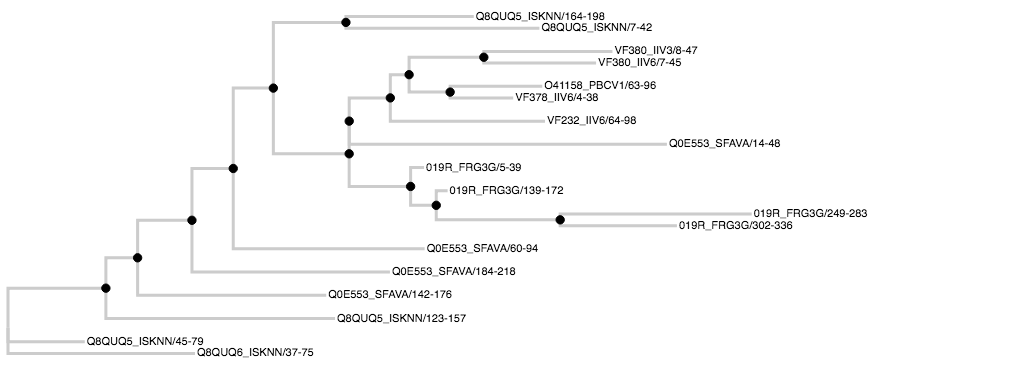

In [55]:
from phylovega import VegaTree

# Read data
df = ph.read_fasta('data/PF08793_seed.fasta')
df = df.phylo.read_newick('data/PF08793_seed.newick', combine_on='id')

# Show using VegaTree
VegaTree(df).display()

From the same DataFrame, we can also show the sequences.

In [56]:
from IPython.display import display

def Fasta(data=''):
    bundle = {}
    bundle['application/vnd.fasta.fasta'] = data
    bundle['text/plain'] = data
    display(bundle, raw=True)

Fasta(df.phylo.to_fasta())

>q2rSZvpf9S
-CPEFAR----DP-TRNPRTGRTIKRGGPTYRALEAECAD
>WWyXL7N2Mk
VCERFAA----DP-TRNPVTGSPLSRNDPLYTDLMEICKG
>dWEqvNSyVU
TCEAFCR----DP-TRNPVTGQKMRRNGIEYQMFAEECDC
>oW3ANFrcXL
YCDEFER----NP-TRNPRTGRTIKRGGPVFRALERECSD
>M3mUODIge2
LCSKWKA----NP-LVNPATGRKIKKDGPVYEKIQKKCS-
>OAzpJWKZpm
QCETFKR----NKQAVSPLTNCPIDKFGRTAARFRKECD-
>UJlYuWJdp4
YCTNFHR----DE-SRNPLTGKKLVPTSPIRKAWHKMCSG
>ePzKtsZBAg
KCIAFDK----ND-KINPFTGRPINENNDTYRMIYSMCHG
>DbIsuxOe1P
VCKKFLA----NK-TVSPYSGRPIKPGKKLYNDLEKHCSG
>0y9ThP4nxW
ACALYYD----DP-TVNPFTDEPLRRYSPIDDLLYRNCES
>CSIP4bckdt
QCRAFEE----NP-DVNPNTGRRISPTGPIASSMRRRCMN
>OQI92LiYUo
LCAEYKR----SP-RYNPWTDRTLAPGSPKHNLISGMCGG
>qdZItQ0meG
KCNQLRN----NRYTVNPVSNRAIAPRGDTANTLRRICEQ
>iQek9tyl8e
VCNDLALCSQHTD-TYNPWTDRALLPDSPVHDMIDYVCNT
>Bs289dvae1
ECEQWLA----NK-GINPRTGKAIKIGGPTYKKLEMECKE
>s9q7qsDfXu
KCSKWHE----QP-LINPLTNRKIKKNGPTYKELERECGP
>4VZ251B0tX
KCYEWDIAKKKSPLPKSPLTGRKLKQHGPTWKKITAECAT
>n6Hf1NBTsZ
KCDEWEKIRLNSS-PKNPFTKRNVKKDGPTYKKIDLICKH


# Introduction to Phylogenetics

The `phylogenetics` package is our attempt at building tools around PhyloPandas.

In [22]:
from phylogenetics import PhylogeneticsProject

Phylogenetics unites many external tools only one single interface and stores their data in a single PhyloPandas DataFrame.

In [31]:
# Define a working directory
working_dir = "project"

# Initialize a working project.
p = PhylogeneticsProject(working_dir, overwrite=True)

Phylogenetics starts with an alignment.

In [32]:
p.read_data('data/PF08793_seed.fasta', schema='fasta')

We can view that data with the `data` attribute.

In [33]:
p.data

,uid,description,id,label,sequence,type,parent,branch_length
0,7uHfHS64O3,Q0E553_SFAVA/14-48,Q0E553_SFAVA/14-48,Q0E553_SFAVA/14-48,QCETFKR----NKQAVSPLTNCPIDKFGRTAARFRKECD-,None,None,None
1,8xiJ70gNVJ,Q8QUQ5_ISKNN/7-42,Q8QUQ5_ISKNN/7-42,Q8QUQ5_ISKNN/7-42,KCNQLRN----NRYTVNPVSNRAIAPRGDTANTLRRICEQ,None,None,None
2,Dkyb9sGTvS,VF380_IIV6/7-45,VF380_IIV6/7-45,VF380_IIV6/7-45,KCDEWEKIRLNSS-PKNPFTKRNVKKDGPTYKKIDLICKH,None,None,None
3,HnNOh5vw4N,VF232_IIV6/64-98,VF232_IIV6/64-98,VF232_IIV6/64-98,ECEQWLA----NK-GINPRTGKAIKIGGPTYKKLEMECKE,None,None,None
4,K9D9FvtBWI,Q0E553_SFAVA/60-94,Q0E553_SFAVA/60-94,Q0E553_SFAVA/60-94,VCKKFLA----NK-TVSPYSGRPIKPGKKLYNDLEKHCSG,None,None,None
5,NUXN1Qb9QV,Q8QUQ5_ISKNN/45-79,Q8QUQ5_ISKNN/45-79,Q8QUQ5_ISKNN/45-79,LCAEYKR----SP-RYNPWTDRTLAPGSPKHNLISGMCGG,None,None,None
6,OIrSn57AQi,VF378_IIV6/4-38,VF378_IIV6/4-38,VF378_IIV6/4-38,KCSKWHE----QP-LINPLTNRKIKKNGPTYKELERECGP,None,None,None
7,P0mxS81G5F,O41158_PBCV1/63-96,O41158_PBCV1/63-96,O41158_PBCV1/63-96,LCSKWKA----NP-LVNPATGRKIKKDGPVYEKIQKKCS-,None,None,None
8,Q51ApZJOTg,Q0E553_SFAVA/142-176,Q0E553_SFAVA/142-176,Q0E553_SFAVA/142-176,YCTNFHR----DE-SRNPLTGKKLVPTSPIRKAWHKMCSG,None,None,None
9,Xm5kU2l8U4,019R_FRG3G/302-336,019R_FRG3G/302-336,019R_FRG3G/302-336,TCEAFCR----DP-TRNPVTGQKMRRNGIEYQMFAEECDC,None,None,None


## Compute Tree.

Phylogenetics (extremely) simplifies the process of phylogenetics. 

To compute a tree, simply call `compute_tree`.

In [34]:
p.compute_tree()

We can see how that changed the dataframe.

In [35]:
p.data

,uid,description,id,label,sequence,type,parent,branch_length,distance,length
0,7uHfHS64O3,Q0E553_SFAVA/14-48,7uHfHS64O3,7uHfHS64O3,QCETFKR----NKQAVSPLTNCPIDKFGRTAARFRKECD-,leaf,7,None,3.4438,1.11328
1,8xiJ70gNVJ,Q8QUQ5_ISKNN/7-42,8xiJ70gNVJ,8xiJ70gNVJ,KCNQLRN----NRYTVNPVSNRAIAPRGDTANTLRRICEQ,leaf,7,None,2.91924,0.588719
2,BFaZor6EuE,NaN,14,14,NaN,node,13,NaN,2.63746,0.373154
3,Dkyb9sGTvS,VF380_IIV6/7-45,Dkyb9sGTvS,Dkyb9sGTvS,KCDEWEKIRLNSS-PKNPFTKRNVKKDGPTYKKIDLICKH,leaf,14,None,3.23225,0.59479
4,DtcP7cdtWd,NaN,4,4,NaN,node,3,NaN,1.22375,0.271494
5,HnNOh5vw4N,VF232_IIV6/64-98,HnNOh5vw4N,HnNOh5vw4N,ECEQWLA----NK-GINPRTGKAIKIGGPTYKKLEMECKE,leaf,12,None,2.80752,0.731564
6,IoApIvtup4,NaN,0,0,NaN,root,None,NaN,0,0
7,K9D9FvtBWI,Q0E553_SFAVA/60-94,K9D9FvtBWI,K9D9FvtBWI,VCKKFLA----NK-TVSPYSGRPIKPGKKLYNDLEKHCSG,leaf,4,None,2.14823,0.924478
8,NUXN1Qb9QV,Q8QUQ5_ISKNN/45-79,NUXN1Qb9QV,NUXN1Qb9QV,LCAEYKR----SP-RYNPWTDRTLAPGSPKHNLISGMCGG,leaf,0,None,0.405144,0.405144
9,OIrSn57AQi,VF378_IIV6/4-38,OIrSn57AQi,OIrSn57AQi,KCSKWHE----QP-LINPLTNRKIKKNGPTYKELERECGP,leaf,15,None,2.76579,0.326868


## What is happening under the hood?

Each method uses PhyloPandas to prepare the data for an external program, like PhyML or PAML. A subprocess call is made to run the program. Then PhyloPandas is used to read in the results.

## Reconstruct ancestors.

To reconstruct ancestors, simply call `compute_reconstruction`.

In [36]:
p.compute_reconstruction()

Again, let's see how the DataFrame changed.

In [37]:
p.data

,uid,description,id,label,sequence,type,parent,branch_length,distance,length,reconstruct_label,ml_sequence,ml_posterior,alt_sequence,alt_posterior
0,7uHfHS64O3,Q0E553_SFAVA/14-48,7uHfHS64O3,7uHfHS64O3,QCETFKR----NKQAVSPLTNCPIDKFGRTAARFRKECD-,leaf,7,None,3.4438,1.11328,7uHfHS64O3,None,None,None,None
1,8xiJ70gNVJ,Q8QUQ5_ISKNN/7-42,8xiJ70gNVJ,8xiJ70gNVJ,KCNQLRN----NRYTVNPVSNRAIAPRGDTANTLRRICEQ,leaf,7,None,2.91924,0.588719,8xiJ70gNVJ,None,None,None,None
2,BFaZor6EuE,NaN,14,14,NaN,node,13,NaN,2.63746,0.373154,31,KCDEWEKIRKNSPLPKNPLTGRKIKKDGPTYKKIERECSN,0.749025,KCDEWDKAKLKNPLPKNPLTGRKIKKNGPTYKKIDAECAN,0.711525
3,Dkyb9sGTvS,VF380_IIV6/7-45,Dkyb9sGTvS,Dkyb9sGTvS,KCDEWEKIRLNSS-PKNPFTKRNVKKDGPTYKKIDLICKH,leaf,14,None,3.23225,0.59479,Dkyb9sGTvS,None,None,None,None
4,DtcP7cdtWd,NaN,4,4,NaN,node,3,NaN,1.22375,0.271494,23,QCKEFERCKKKNPYTVNPFTGRPIKPGGPIYNALERMCSG,0.67355,QCNEFEKCRKKNPYTINPYTGRPIKPGGPVYKTLEKMCSG,0.6331
5,HnNOh5vw4N,VF232_IIV6/64-98,HnNOh5vw4N,HnNOh5vw4N,ECEQWLA----NK-GINPRTGKAIKIGGPTYKKLEMECKE,leaf,12,None,2.80752,0.731564,HnNOh5vw4N,None,None,None,None
6,IoApIvtup4,NaN,0,0,NaN,root,None,NaN,0,0,19,LCAEFKRCSQHSPYTYNPWTDRTLAPGSPVHNLISGMCGG,0.690575,VCADYKRCSQHSPYTYNPWTDRALAPGSPIHDMINRMCNG,0.642775
7,K9D9FvtBWI,Q0E553_SFAVA/60-94,K9D9FvtBWI,K9D9FvtBWI,VCKKFLA----NK-TVSPYSGRPIKPGKKLYNDLEKHCSG,leaf,4,None,2.14823,0.924478,K9D9FvtBWI,None,None,None,None
8,NUXN1Qb9QV,Q8QUQ5_ISKNN/45-79,NUXN1Qb9QV,NUXN1Qb9QV,LCAEYKR----SP-RYNPWTDRTLAPGSPKHNLISGMCGG,leaf,0,None,0.405144,0.405144,NUXN1Qb9QV,None,None,None,None
9,OIrSn57AQi,VF378_IIV6/4-38,OIrSn57AQi,OIrSn57AQi,KCSKWHE----QP-LINPLTNRKIKKNGPTYKELERECGP,leaf,15,None,2.76579,0.326868,OIrSn57AQi,None,None,None,None


Let's just look at ancestors.

In [44]:
anc_df = p.data[p.data.type == 'node']
anc_df

,uid,description,id,label,sequence,type,parent,branch_length,distance,length,reconstruct_label,ml_sequence,ml_posterior,alt_sequence,alt_posterior
2,BFaZor6EuE,NaN,14,14,NaN,node,13,NaN,2.63746,0.373154,31,KCDEWEKIRKNSPLPKNPLTGRKIKKDGPTYKKIERECSN,0.749025,KCDEWDKAKLKNPLPKNPLTGRKIKKNGPTYKKIDAECAN,0.711525
4,DtcP7cdtWd,NaN,4,4,NaN,node,3,NaN,1.22375,0.271494,23,QCKEFERCKKKNPYTVNPFTGRPIKPGGPIYNALERMCSG,0.67355,QCNEFEKCRKKNPYTINPYTGRPIKPGGPVYKTLEKMCSG,0.6331
12,SRW6EgVgxE,NaN,5,5,NaN,node,4,NaN,1.43961,0.215859,24,QCNEFERCKKKNPYTVNPFTGRPIKPGGPIYNALERECSD,0.682975,QCDEFEKCRKKNPLTINPFTGRPIKPGGPVYKTLERECSG,0.652475
13,Tz0hYQpx5R,NaN,3,3,NaN,node,2,NaN,0.952259,0.272562,22,KCTEFERCKKKNPYTVNPFTGRPIKPGSPIYNMLHRMCSG,0.657025,KCTEFHKCKKKNPYTINPFTGRPIKPGNPVYKMLYKMCNG,0.6163
14,XL0o3hnaCs,NaN,2,2,NaN,node,1,NaN,0.679697,0.179375,21,YCTEFHRCKKNNPYTVNPFTGRPLKPGSPIHNMLHRMCSG,0.646225,YCAEFHKCKKNDPYTINPFTGKPLKPGSPVYKLLYKMCNG,0.571725
18,aSofOlEEUv,NaN,1,1,NaN,node,0,NaN,0.500322,0.500322,20,LCAEFHRCKKHNPYTVNPFTDRPLKPGSPIHNLLHRMCSG,0.638175,LCTEYHKCKKHDPYTINPFTGKPLKPGSPVHDMIYKMCNG,0.54445
20,dwmyZk8avM,NaN,8,8,NaN,node,5,NaN,1.78839,0.34878,25,KCDEFERCKKKNPLTVNPRTGRTIKRGGPVYRALERECSD,0.77595,QCDEFERCRKNNPLTINPLTGRTIKKGGPTYKALERECSD,0.737225
21,e7F0s2uMtH,NaN,7,7,NaN,node,6,NaN,2.33052,0.463747,34,QCNQFKKCKKKNRYTVNPLTNRPIAPRGPTANTLRRECEQ,0.611675,KCNQFRRCKKKNKYTVNPVSGRAISPRGDTASTLRRECDN,0.54635
22,imPNHH88wV,NaN,9,9,NaN,node,8,NaN,1.98335,0.194962,26,YCDEFERIKKKNPLTRNPRTGRTIKRGGPVYRALERECSD,0.872175,YCDEFERIRKKNPLTRNPRTGRTIKRGGPTYRALERECSD,0.85925
23,ipPVgLBzul,NaN,10,10,NaN,node,9,NaN,2.11841,0.135059,27,YCDEFARIKKKDPLTRNPRTGRTIKRGGPTYRALEAECAD,0.847875,YCDEFARIRKKDPLTRNPRTGRTIKRGGPVYRALEAECSD,0.8312


Let's write that to file. 

In [47]:
fasta_str = anc_df.phylo.to_fasta(sequence_col='ml_sequence')

print(fasta_str)

>BFaZor6EuE
KCDEWEKIRKNSPLPKNPLTGRKIKKDGPTYKKIERECSN
>DtcP7cdtWd
QCKEFERCKKKNPYTVNPFTGRPIKPGGPIYNALERMCSG
>SRW6EgVgxE
QCNEFERCKKKNPYTVNPFTGRPIKPGGPIYNALERECSD
>Tz0hYQpx5R
KCTEFERCKKKNPYTVNPFTGRPIKPGSPIYNMLHRMCSG
>XL0o3hnaCs
YCTEFHRCKKNNPYTVNPFTGRPLKPGSPIHNMLHRMCSG
>aSofOlEEUv
LCAEFHRCKKHNPYTVNPFTDRPLKPGSPIHNLLHRMCSG
>dwmyZk8avM
KCDEFERCKKKNPLTVNPRTGRTIKRGGPVYRALERECSD
>e7F0s2uMtH
QCNQFKKCKKKNRYTVNPLTNRPIAPRGPTANTLRRECEQ
>imPNHH88wV
YCDEFERIKKKNPLTRNPRTGRTIKRGGPVYRALERECSD
>ipPVgLBzul
YCDEFARIKKKDPLTRNPRTGRTIKRGGPTYRALEAECAD
>lmNFCoqIxP
KCSKWEAIRKKNPLLINPLTGRKIKKNGPTYKKLERECSP
>nIGBUVjI9J
KCDEWEAIRKKNPLPINPLTGRKIKKNGPTYKKLERECSD
>oVdZp3rRhX
QCNEFEKCKKKNPYTVNPLTGRPISPTGPIANSLRRRCSN
>tUXHsbXROa
TCEEFARIKKKDPLTRNPVTGRTLRRNGPTYQALAEECDG
>vIw2SbZJe5
KCDEWEAIRKKNPLTINPRTGRTIKKGGPTYKKLERECSD



Congratulations! You just reconstructed protein ancestors!